In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np

## Preguntas objetivo
- ¿Cómo se han ganado más partidos, estando en casa o de visitante?
- ¿Qué equipos han hecho la mayor cantidad de puntos, tanto en casa como visitante?
- ¿Cuántos partidos han ganado los distintos equipos estando en casa y de visitante?
- ¿Cómo se ha comportado los puntos anotados a lo largo de los años?
- ¿Contra cuáles equipos han ganado más estando en casa y visitante?

In [3]:
games = pd.read_csv("./kaggle/input/nba-games/games.csv")
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [5]:
games = games[["GAME_DATE_EST", "GAME_ID", "GAME_STATUS_TEXT", "TEAM_ID_home",
               "TEAM_ID_away","PTS_home", "PTS_away", "HOME_TEAM_WINS"]]
games.head()


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0


In [6]:
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26651 non-null  datetime64[ns]
 1   GAME_ID           26651 non-null  int64         
 2   GAME_STATUS_TEXT  26651 non-null  object        
 3   TEAM_ID_home      26651 non-null  int64         
 4   TEAM_ID_away      26651 non-null  int64         
 5   PTS_home          26552 non-null  float64       
 6   PTS_away          26552 non-null  float64       
 7   HOME_TEAM_WINS    26651 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.6+ MB


In [8]:
games["Year"] = games["GAME_DATE_EST"].dt.year
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,Year
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022


In [9]:
# Cargar el conjunto de teams
teams = pd.read_csv("./kaggle/input/nba-games/teams.csv")
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [10]:
teams = teams[["TEAM_ID", "CITY", "NICKNAME"]]
teams.head()

,TEAM_ID,CITY,NICKNAME
0,1610612737,Atlanta,Hawks
1,1610612738,Boston,Celtics
2,1610612740,New Orleans,Pelicans
3,1610612741,Chicago,Bulls
4,1610612742,Dallas,Mavericks


In [11]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TEAM_ID   30 non-null     int64 
 1   CITY      30 non-null     object
 2   NICKNAME  30 non-null     object
dtypes: int64(1), object(2)
memory usage: 852.0+ bytes


In [12]:
home_games = pd.merge(games, teams, left_on = "TEAM_ID_home", right_on = "TEAM_ID", how = "inner")
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,Year,TEAM_ID,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks


In [13]:
home_games = home_games.rename(columns={
    "CITY" : "city_home",
    "NICKNAME" : "nickname_home"
})
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,Year,TEAM_ID,city_home,nickname_home
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks


In [14]:
both_games = pd.merge(home_games, teams, left_on= "TEAM_ID_away", right_on="TEAM_ID", how="inner")
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,Year,TEAM_ID_x,city_home,nickname_home,TEAM_ID_y,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz,1610612764,Washington,Wizards
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers,1610612749,Milwaukee,Bucks
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers,1610612765,Detroit,Pistons
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks,1610612741,Chicago,Bulls


In [15]:
both_games = both_games.rename(columns={
    'CITY': 'city_away',
    'NICKNAME': 'nickname_away'
})
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,Year,TEAM_ID_x,city_home,nickname_home,TEAM_ID_y,city_away,nickname_away
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz,1610612764,Washington,Wizards
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers,1610612749,Milwaukee,Bucks
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers,1610612765,Detroit,Pistons
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks,1610612741,Chicago,Bulls


In [16]:
both_teams = both_games.drop(columns=[
    "TEAM_ID_home", "TEAM_ID_away", "TEAM_ID_x", "TEAM_ID_y"
])
both_teams.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,PTS_home,PTS_away,HOME_TEAM_WINS,Year,city_home,nickname_home,city_away,nickname_away
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
1,2022-12-22,22200478,Final,120.0,112.0,1,2022,Utah,Jazz,Washington,Wizards
2,2022-12-21,22200466,Final,114.0,106.0,1,2022,Cleveland,Cavaliers,Milwaukee,Bucks
3,2022-12-21,22200467,Final,113.0,93.0,1,2022,Philadelphia,76ers,Detroit,Pistons
4,2022-12-21,22200468,Final,108.0,110.0,0,2022,Atlanta,Hawks,Chicago,Bulls


In [17]:
games = both_games.copy()
games.columns = games.columns.str.lower()
games.head()

,game_date_est,game_id,game_status_text,team_id_home,team_id_away,pts_home,pts_away,home_team_wins,year,team_id_x,city_home,nickname_home,team_id_y,city_away,nickname_away
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz,1610612764,Washington,Wizards
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers,1610612749,Milwaukee,Bucks
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers,1610612765,Detroit,Pistons
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks,1610612741,Chicago,Bulls


In [18]:
games["total_points"] = games["pts_home"] + games["pts_away"]
games.head()

,game_date_est,game_id,game_status_text,team_id_home,team_id_away,pts_home,pts_away,home_team_wins,year,team_id_x,city_home,nickname_home,team_id_y,city_away,nickname_away,total_points
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs,243.0
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz,1610612764,Washington,Wizards,232.0
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers,1610612749,Milwaukee,Bucks,220.0
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers,1610612765,Detroit,Pistons,206.0
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks,1610612741,Chicago,Bulls,218.0


In [19]:
games.nlargest(n=5, columns="total_points")

,game_date_est,game_id,game_status_text,team_id_home,team_id_away,pts_home,pts_away,home_team_wins,year,team_id_x,city_home,nickname_home,team_id_y,city_away,nickname_away,total_points
20030,2019-03-01,21800928,Final,1610612737,1610612741,161.0,168.0,0,2019,1610612737,Atlanta,Hawks,1610612741,Chicago,Bulls,329.0
14727,2006-12-07,20600271,Final,1610612751,1610612756,157.0,161.0,0,2006,1610612751,Brooklyn,Nets,1610612756,Phoenix,Suns,318.0
19528,2019-10-30,21900061,Final,1610612764,1610612745,158.0,159.0,0,2019,1610612764,Washington,Wizards,1610612745,Houston,Rockets,317.0
969,2022-02-25,22100899,Final,1610612764,1610612759,153.0,157.0,0,2022,1610612764,Washington,Wizards,1610612759,San Antonio,Spurs,310.0
3349,2020-07-31,21901238,Final,1610612742,1610612745,149.0,153.0,0,2020,1610612742,Dallas,Mavericks,1610612745,Houston,Rockets,302.0


In [20]:
games.nsmallest(n=5, columns="total_points")

,game_date_est,game_id,game_status_text,team_id_home,team_id_away,pts_home,pts_away,home_team_wins,year,team_id_x,city_home,nickname_home,team_id_y,city_away,nickname_away,total_points
13632,2007-10-19,10700072,Final,1610612738,1610612751,36.0,33.0,1,2007,1610612738,Boston,Celtics,1610612751,Brooklyn,Nets,69.0
19275,2003-10-08,10300012,Final,1610612754,1610612741,62.0,58.0,1,2003,1610612754,Indiana,Pacers,1610612741,Chicago,Bulls,120.0
17807,2004-11-09,20400049,Final,1610612751,1610612757,64.0,60.0,1,2004,1610612751,Brooklyn,Nets,1610612757,Portland,Trail Blazers,124.0
16931,2005-03-13,20400927,Final,1610612765,1610612762,64.0,62.0,1,2005,1610612765,Detroit,Pistons,1610612762,Utah,Jazz,126.0
19137,2003-11-01,20300031,Final,1610612750,1610612761,73.0,56.0,1,2003,1610612750,Minnesota,Timberwolves,1610612761,Toronto,Raptors,129.0


## Graficos

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
total = games["home_team_wins"].value_counts()
total

home_team_wins
1    15645
0    11006
Name: count, dtype: int64

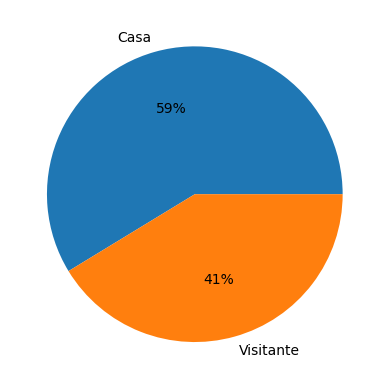

In [23]:
plt.pie(total.values, labels=['Casa', 'Visitante'], autopct='%.0f%%')
plt.show()

/tmp/ipykernel_43203/921809849.py:4: FutureWarning: The provided callable <function mean at 0x7b255d1ec0e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result = home_wins.groupby("nickname_home")['pts_home'].aggregate(np.mean).reset_index().sort_values('pts_home')


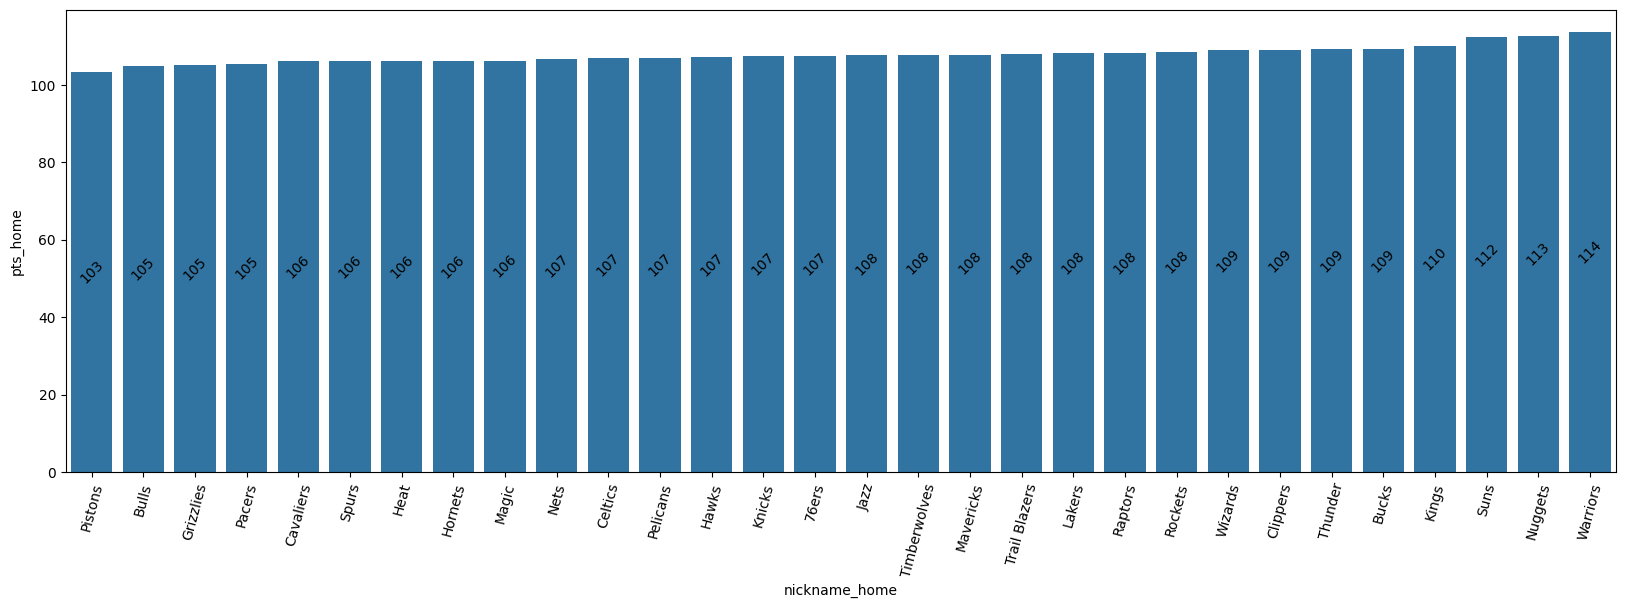

In [24]:
## cantidad de puntos por equipo cuando juegan en casa o de visita
plt.figure(figsize=(20,6))
home_wins = games[games["home_team_wins"]== 1]
result = home_wins.groupby("nickname_home")['pts_home'].aggregate(np.mean).reset_index().sort_values('pts_home')

ax = sns.barplot(data=home_wins, x="nickname_home", y="pts_home", order=result["nickname_home"], errorbar=None)
ax.bar_label(ax.containers[-1], fmt="%.0f", label_type="center", rotation=45)
plt.xticks(rotation=75)
plt.show()

/tmp/ipykernel_43203/125321918.py:3: FutureWarning: The provided callable <function mean at 0x7b255d1ec0e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result = away_wins.groupby('nickname_away')['pts_away'].aggregate(np.mean).reset_index().sort_values('pts_away')


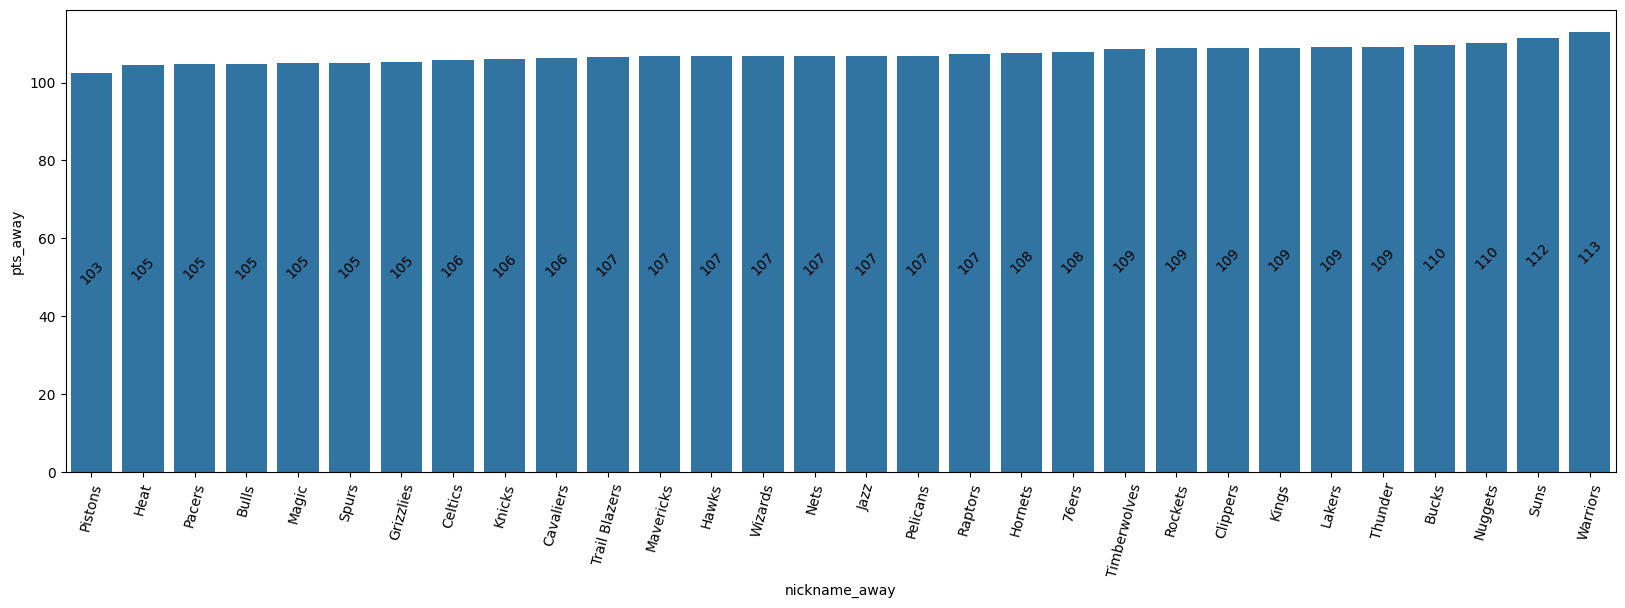

In [25]:
plt.figure(figsize=(20,6))
away_wins = games[games['home_team_wins'] == 0]
result = away_wins.groupby('nickname_away')['pts_away'].aggregate(np.mean).reset_index().sort_values('pts_away')

ax = sns.barplot(data=away_wins, x='nickname_away', y='pts_away', order=result['nickname_away'], errorbar=None)
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='center', rotation=45)
plt.xticks(rotation=75)
plt.show()

<Axes: xlabel='total_points', ylabel='Count'>

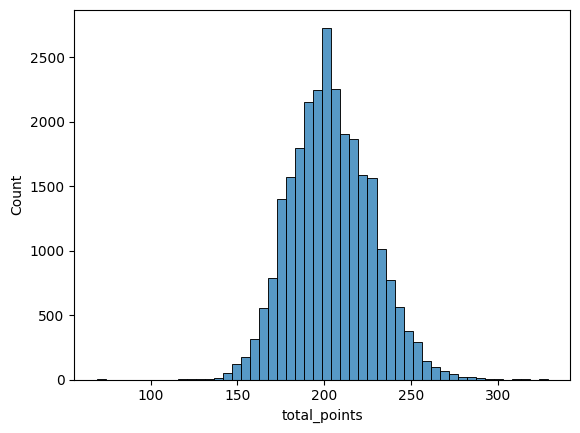

In [26]:
sns.histplot(data=games, x="total_points", bins=50)

<Axes: xlabel='total_points'>

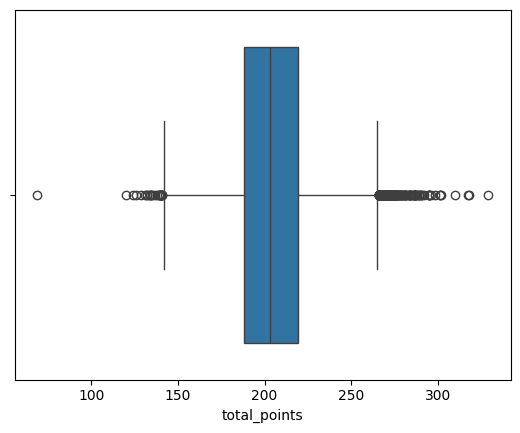

In [27]:
sns.boxplot(x=games["total_points"])

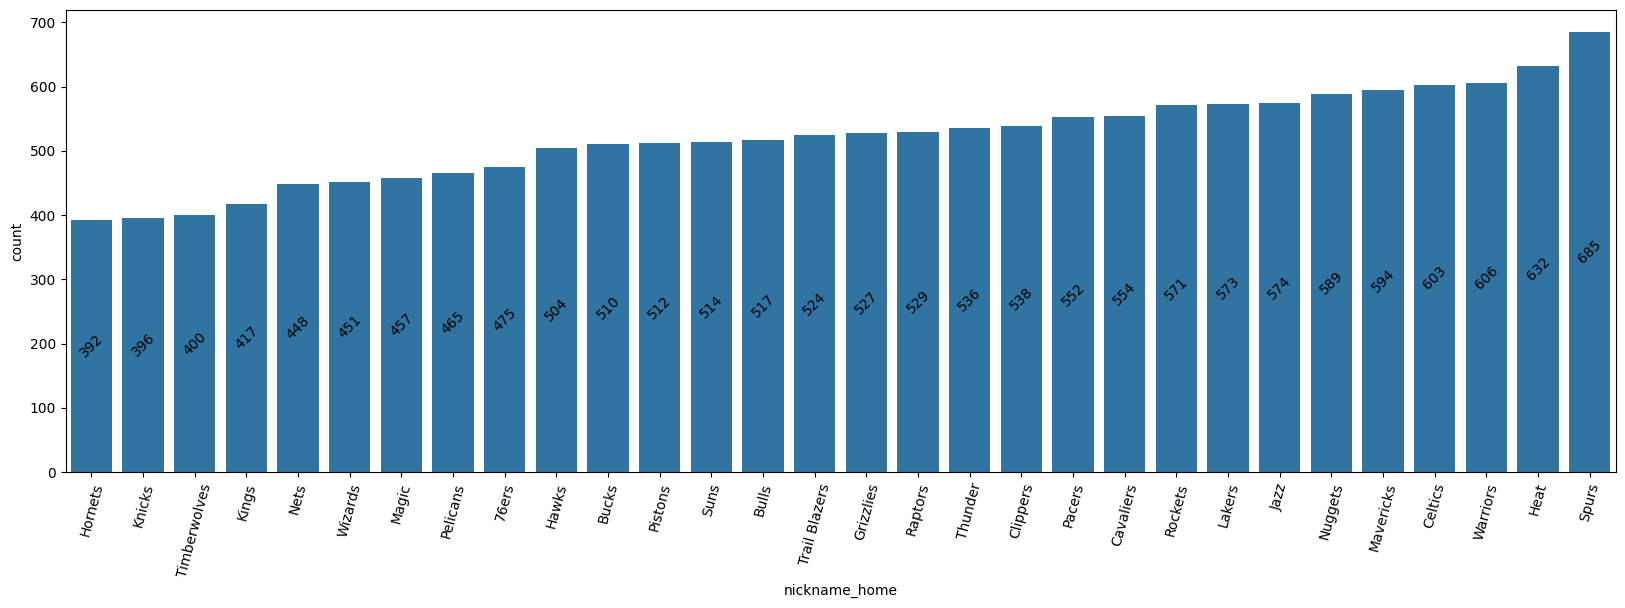

In [28]:
plt.figure(figsize=(20,6))

result = home_wins["nickname_home"].value_counts().sort_values()

ax = sns. countplot(x= "nickname_home", data=home_wins, order=result.index)
ax.bar_label(ax.containers[-1], label_type="center",  rotation=45)

plt.xticks(rotation=75)
plt.show()

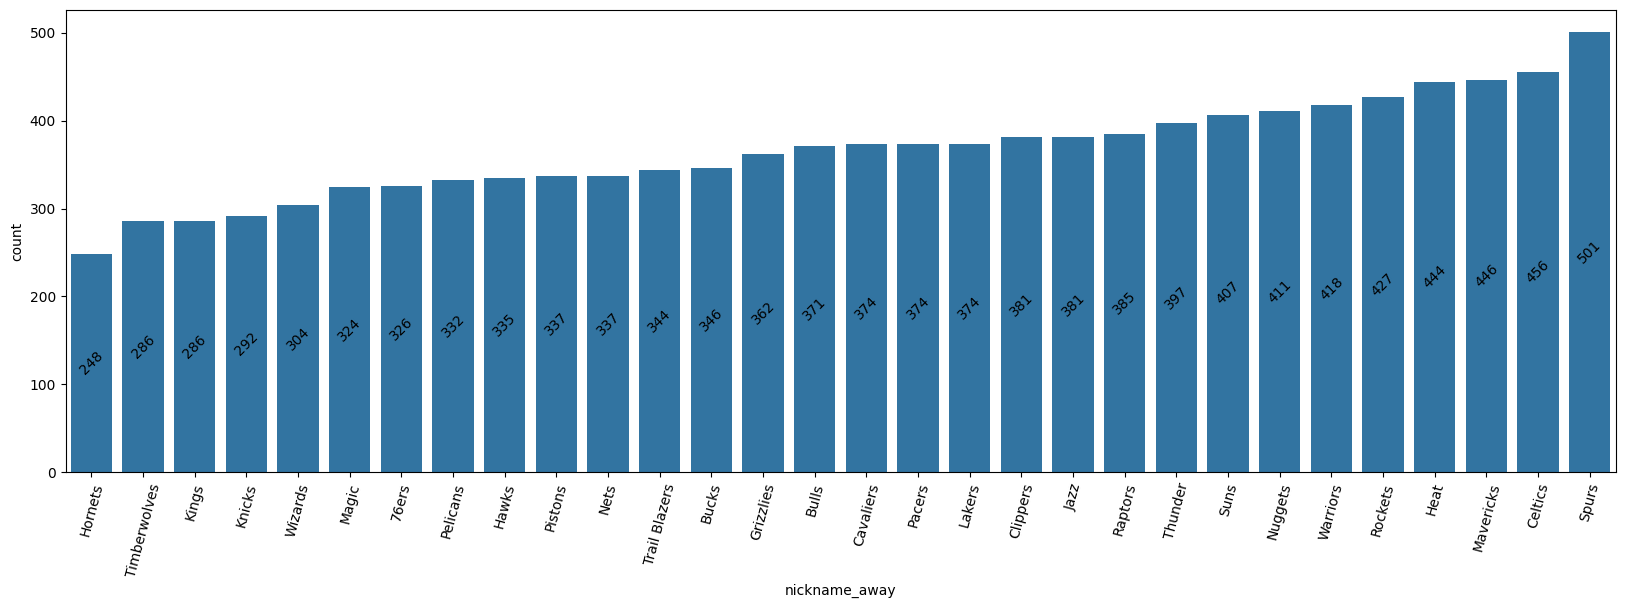

In [29]:
plt.figure(figsize=(20,6))

result = away_wins["nickname_away"].value_counts().sort_values()

ax = sns. countplot(x= "nickname_away", data=away_wins, order=result.index)
ax.bar_label(ax.containers[-1], label_type="center",  rotation=45)

plt.xticks(rotation=75)
plt.show()

In [30]:
games.head()

,game_date_est,game_id,game_status_text,team_id_home,team_id_away,pts_home,pts_away,home_team_wins,year,team_id_x,city_home,nickname_home,team_id_y,city_away,nickname_away,total_points
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs,243.0
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz,1610612764,Washington,Wizards,232.0
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers,1610612749,Milwaukee,Bucks,220.0
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers,1610612765,Detroit,Pistons,206.0
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks,1610612741,Chicago,Bulls,218.0


In [31]:
games.groupby("year")["total_points"].mean()

year
2003    184.475269
2004    188.379151
2005    193.944251
2006    195.553411
2007    196.871795
2008    198.470180
2009    200.169468
2010    199.734637
2011    197.679781
2012    192.825949
2013    197.085196
2014    201.815406
2015    200.326991
2016    207.307908
2017    211.543402
2018    216.689580
2019    221.965465
2020    224.262899
2021    221.128160
2022    224.392377
Name: total_points, dtype: float64

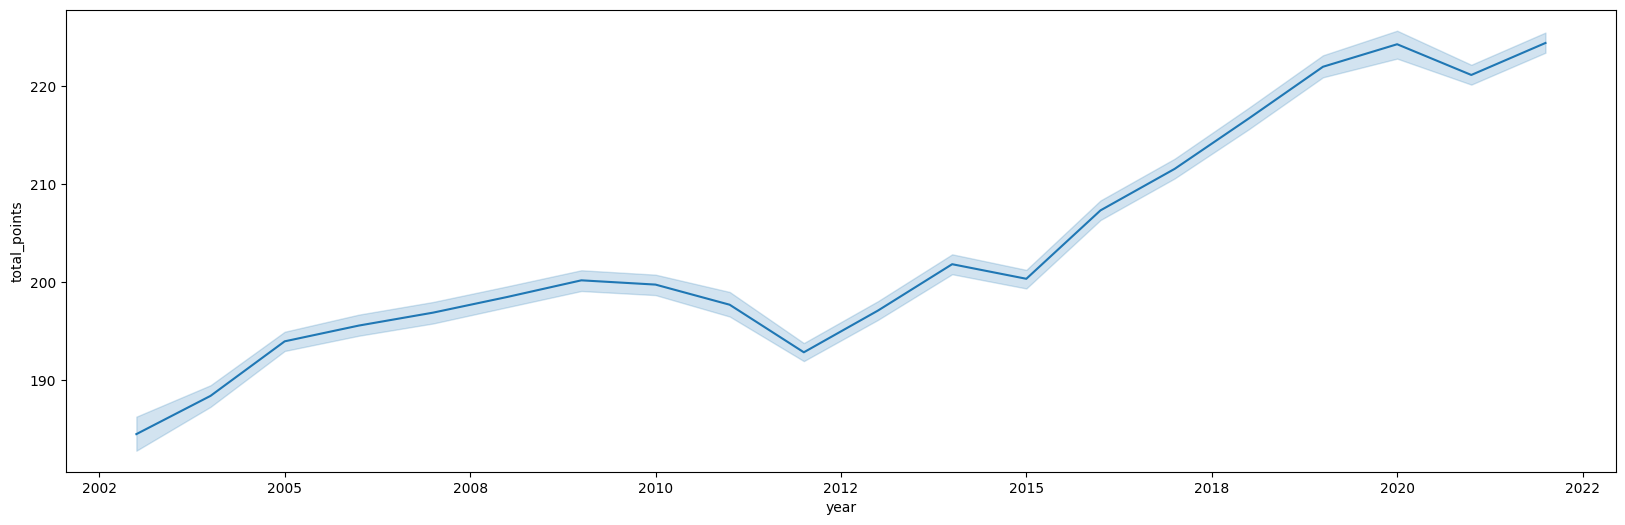

In [32]:
plt.figure(figsize=(20,6))

ax= sns.lineplot(data=games, x="year", y="total_points")

def format_xlabels(value, pos):
    return str(int(round(value)))

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_xlabels))

plt.show()

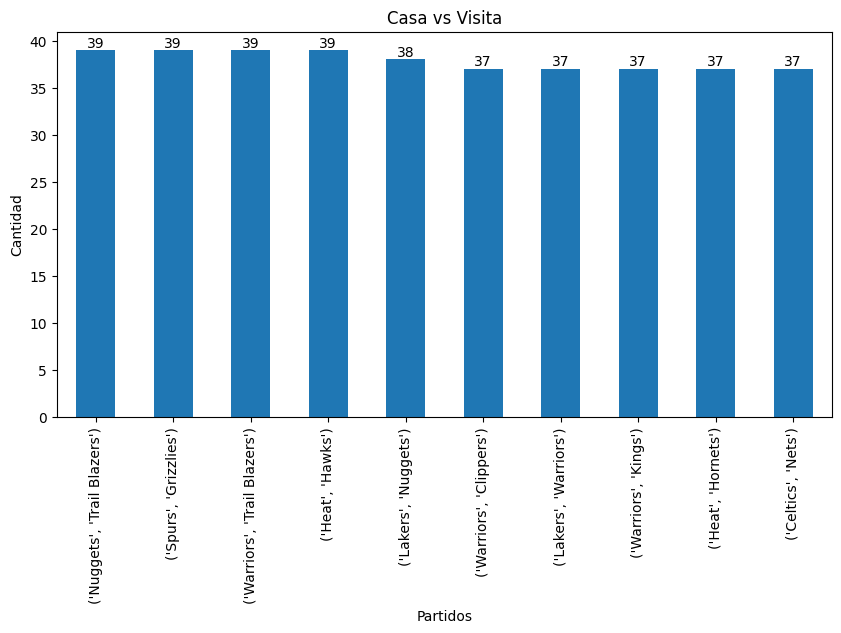

In [33]:
x = home_wins[["nickname_home", "nickname_away"]].value_counts()

ax= x[:10].plot(kind="bar", figsize=[10,5])
ax.set_title("Casa vs Visita")
ax.set_xlabel("Partidos")
ax.set_ylabel("Cantidad")
ax.set_xticklabels(x.index[:10], rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
    
plt.show()

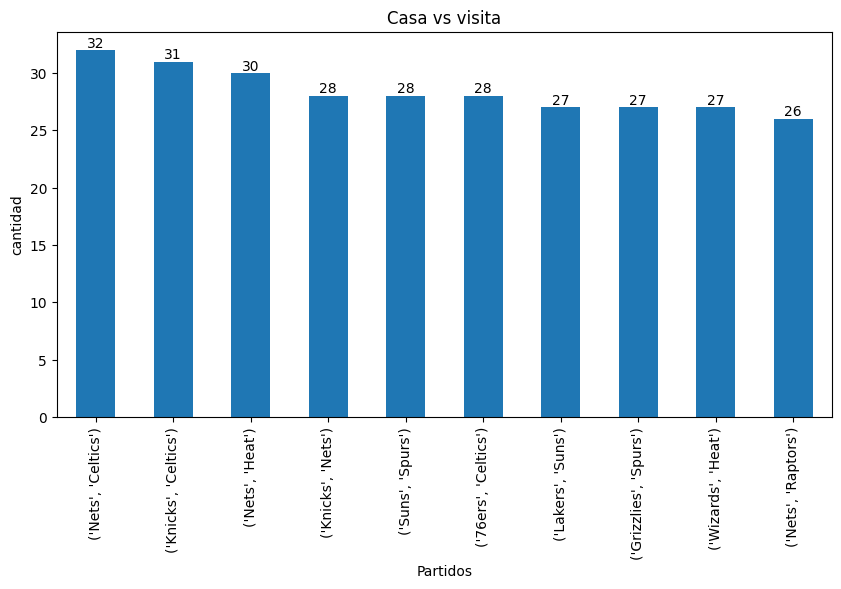

In [34]:
x = away_wins[['nickname_home', 'nickname_away']].value_counts()

ax = x[:10].plot(kind="bar", figsize=[10, 5])
ax.set_title('Casa vs visita')
ax.set_xlabel('Partidos')
ax.set_ylabel('cantidad')
ax.set_xticklabels(x.index[:10], rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')

plt.show()

In [35]:
game_details = pd.read_csv("./kaggle/input/nba-games/games_details.csv")
game_details.head()

/tmp/ipykernel_43203/3385252300.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  game_details = pd.read_csv("./kaggle/input/nba-games/games_details.csv")


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [36]:
game_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

In [37]:
game_details = game_details[["GAME_ID", "PLAYER_NAME", "PTS"]]
game_details

,GAME_ID,PLAYER_NAME,PTS
0,22200477,Romeo Langford,2.0
1,22200477,Jeremy Sochan,23.0
2,22200477,Jakob Poeltl,13.0
3,22200477,Devin Vassell,10.0
4,22200477,Tre Jones,19.0
...,...,...,...
668623,11200005,Jordan Hamilton,17.0
668624,11200005,Kenneth Faried,18.0
668625,11200005,Kosta Koufos,6.0
668626,11200005,Timofey Mozgov,2.0


In [38]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   game_date_est     26651 non-null  datetime64[ns]
 1   game_id           26651 non-null  int64         
 2   game_status_text  26651 non-null  object        
 3   team_id_home      26651 non-null  int64         
 4   team_id_away      26651 non-null  int64         
 5   pts_home          26552 non-null  float64       
 6   pts_away          26552 non-null  float64       
 7   home_team_wins    26651 non-null  int64         
 8   year              26651 non-null  int32         
 9   team_id_x         26651 non-null  int64         
 10  city_home         26651 non-null  object        
 11  nickname_home     26651 non-null  object        
 12  team_id_y         26651 non-null  int64         
 13  city_away         26651 non-null  object        
 14  nickname_away     2665

In [39]:
game_complete = pd.merge(game_details, games, left_on="GAME_ID", right_on="game_id", how="inner")
game_complete.head()

,GAME_ID,PLAYER_NAME,PTS,game_date_est,game_id,game_status_text,team_id_home,team_id_away,pts_home,pts_away,home_team_wins,year,team_id_x,city_home,nickname_home,team_id_y,city_away,nickname_away,total_points
0,22200477,Romeo Langford,2.0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs,243.0
1,22200477,Jeremy Sochan,23.0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs,243.0
2,22200477,Jakob Poeltl,13.0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs,243.0
3,22200477,Devin Vassell,10.0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs,243.0
4,22200477,Tre Jones,19.0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs,243.0


In [40]:
player_pts = game_complete.groupby(["year", "PLAYER_NAME"])["PTS"].mean().reset_index().sort_values("year")
player_pts.head(10)

,year,PLAYER_NAME,PTS
0,2003,A.J. Guyton,4.000000
307,2003,Nazr Mohammed,6.382353
306,2003,Morris Peterson,7.032258
305,2003,Moochie Norris,2.843750
304,2003,Monty Williams,2.000000
303,2003,Mo Williams,4.833333
302,2003,Mitchell Butler,2.714286
301,2003,Milt Palacio,4.880000
300,2003,Mikki Moore,1.000000
299,2003,Mike Wilks,2.285714


In [41]:
player_pts[player_pts['year'] == 2022].sort_values(by='PTS', ascending=False).head(10)

,year,PLAYER_NAME,PTS
11862,2022,Giannis Antetokounmpo,31.358974
11978,2022,Joel Embiid,31.166667
12094,2022,Luka Doncic,30.644444
12266,2022,Shai Gilgeous-Alexander,29.074074
12050,2022,Kevin Durant,29.029851
12081,2022,LeBron James,28.741379
11899,2022,Ja Morant,28.000000
11960,2022,Jayson Tatum,27.880000
11799,2022,Devin Booker,27.750000
12306,2022,Trae Young,27.333333
